In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Pull Airline Arrival data
path = '/Users/mac/Dropbox/Thinkful_Coursework/Course/Unit_3/Lesson 6/Airline Arrivals/2008.csv'
df = pd.read_csv(path)

In [3]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


# Explore and Clean Dataset

In [4]:
# Number of rows and columns
x = 93
print('Shape of dataframe')
print('-' *x)
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
print('-' *x)

# Check data types
print('Column Data Types')
print('-' *x)
print(df.dtypes)
print('-' *x)

# Check for missing data
print('Missing Data in Dataframe')
print('-' *x)
print(df.isnull().sum().sort_values(ascending=False))
print('-' *x)

# Check for outliers
print('Column Summary')
print('-' *x)
df.describe().transpose()

Shape of dataframe
---------------------------------------------------------------------------------------------
No. of Rows: 7009728
No. of Columns: 29
---------------------------------------------------------------------------------------------
Column Data Types
---------------------------------------------------------------------------------------------
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Can

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


In [5]:
#Fill missing data points with modes for each feature
cols_na = ['CancellationCode','LateAircraftDelay','SecurityDelay','NASDelay','WeatherDelay','CarrierDelay',
        'ActualElapsedTime','AirTime','ArrDelay','TaxiIn','ArrTime','TaxiOut','DepDelay','DepTime',
       'TailNum','CRSElapsedTime']

df[cols_na]=df[cols_na].fillna(df.mode().iloc[0])

In [6]:
df[cols_na].head()

,CancellationCode,LateAircraftDelay,SecurityDelay,NASDelay,WeatherDelay,CarrierDelay,ActualElapsedTime,AirTime,ArrDelay,TaxiIn,ArrTime,TaxiOut,DepDelay,DepTime,TailNum,CRSElapsedTime
0,B,0.0,0.0,0.0,0.0,0.0,128.0,116.0,-14.0,4.0,2211.0,8.0,8.0,2003.0,N712SW,150.0
1,B,0.0,0.0,0.0,0.0,0.0,128.0,113.0,2.0,5.0,1002.0,10.0,19.0,754.0,N772SW,145.0
2,B,0.0,0.0,0.0,0.0,0.0,96.0,76.0,14.0,3.0,804.0,17.0,8.0,628.0,N428WN,90.0
3,B,0.0,0.0,0.0,0.0,0.0,88.0,78.0,-6.0,3.0,1054.0,7.0,-4.0,926.0,N612SW,90.0
4,B,32.0,0.0,0.0,0.0,2.0,90.0,77.0,34.0,3.0,1959.0,10.0,34.0,1829.0,N464WN,90.0


In [7]:
# Check if missing data remains
print('Missing Data in Dataframe')
print('-' *x)
print(df.isnull().sum().sort_values(ascending=False))
print('-' *x)

Missing Data in Dataframe
---------------------------------------------------------------------------------------------
LateAircraftDelay    0
AirTime              0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
ArrDelay             0
SecurityDelay        0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
Year                 0
dtype: int64
---------------------------------------------------------------------------------------------


In [8]:
from sklearn.preprocessing import LabelEncoder

#Encode categorical features to prepare model
df_encode = df.copy()
lb_make = LabelEncoder()

df_encode['UniqueCarrier'] = lb_make.fit_transform(df['UniqueCarrier'])
df_encode['Origin'] = lb_make.fit_transform(df['Origin'])
df_encode['Dest'] = lb_make.fit_transform(df['Dest'])
df_encode['TailNum'] = lb_make.fit_transform(df['TailNum'])
df_encode['CancellationCode'] = lb_make.fit_transform(df['CancellationCode'])

df_encode.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,17,335,...,4.0,8.0,0,1,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,17,3231,...,5.0,10.0,0,1,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,17,448,...,3.0,17.0,0,1,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,926.0,930,1054.0,1100,17,1746,...,3.0,7.0,0,1,0,0.0,0.0,0.0,0.0,0.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,17,3920,...,3.0,10.0,0,1,0,2.0,0.0,0.0,0.0,32.0


In [9]:
#Make Late feature categorical
df_encode['Late'] = np.where(df_encode['ArrDelay']>=30, 1, 0)

#Check balance of outcome variable
x=115
print('-' *x)
print('On-Time is', round(df_encode['Late'].value_counts()[0]/len(df_encode) * 100,1), '% of the dataset')
print('Late is', round(df_encode['Late'].value_counts()[1]/len(df_encode) * 100,1), '% of the dataset')
print('-' *x)
print('No. of On-Time rows is ', round(df_encode['Late'].value_counts()[0]))
print('No. of Late rows is ', round(df_encode['Late'].value_counts()[1]))
print('-' *x)

-------------------------------------------------------------------------------------------------------------------
On-Time is 86.8 % of the dataset
Late is 13.2 % of the dataset
-------------------------------------------------------------------------------------------------------------------
No. of On-Time rows is  6082313
No. of Late rows is  927415
-------------------------------------------------------------------------------------------------------------------


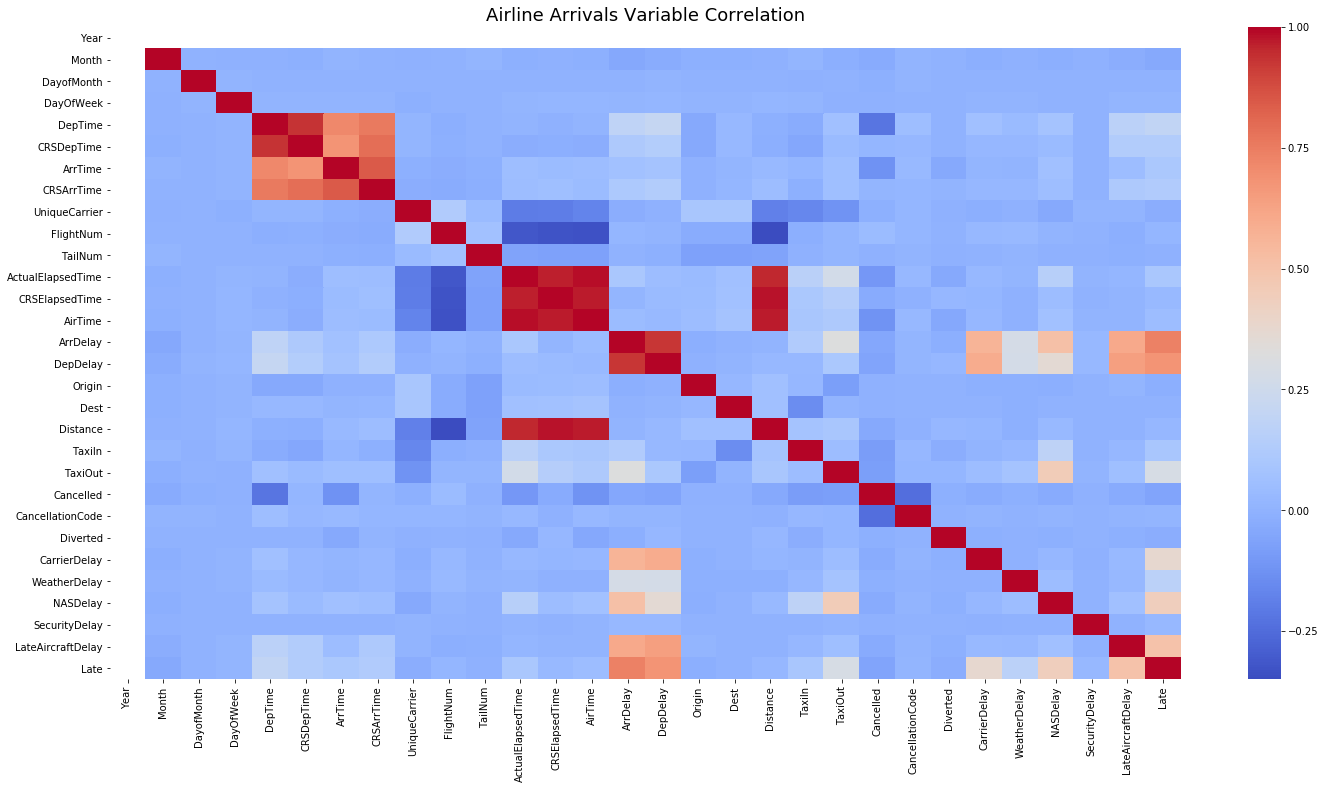

In [10]:
#Create correlation plot
plt.figure(figsize=(24,12))

corr = df_encode.corr()
sns.heatmap(corr, cmap='coolwarm')

plt.title('Airline Arrivals Variable Correlation', fontsize=18)

plt.show()

# Model Evaluation - Unbalanced, No Data Leakage

Logisitic Regression Classifer Model Accuarcy is 86.77 %
Random Forest Classifer Model Accuarcy is 86.57 %


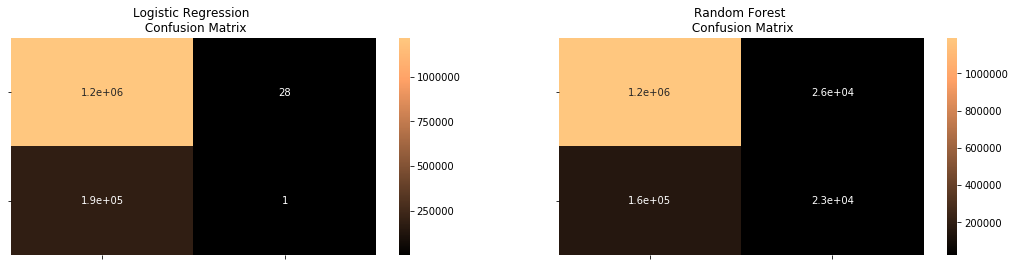

In [11]:
#Set input and output variables for models.  
#Remove features that may cause data leakage.  
#Some features in the data set will not be available prior to running the model 

X = df_encode[['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier','FlightNum',
              'TailNum','CRSElapsedTime','Origin','Dest','Distance']]

y = df_encode['Late']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

#Define classifer models
lr = LogisticRegression()
rf = RandomForestClassifier()

#Fit classifer models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

#Return classifer accuracy scores
print('Logisitic Regression Classifer Model Accuarcy is', round(lr.score(X_test, y_test) * 100,2),'%')
print('Random Forest Classifer Model Accuarcy is', round(rf.score(X_test, y_test) * 100,2),'%')

#Get y_pred for classifers
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

#Get confusion matrix for all classifers
lr_cm = confusion_matrix(y_test, y_pred_lr)
rf_cm = confusion_matrix(y_test, y_pred_rf)

#Setup Confusion Matrix Plots
fig, ax = plt.subplots(1, 2,figsize=(18,4))
labels = ['No Fraud', 'Fraud']

#Logisitic Regression Confusion Matrix
sns.heatmap(lr_cm, ax=ax[0], annot=True, annot_kws={"size": 10}, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=12)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

#Random Forest Confusion Matrix
sns.heatmap(rf_cm, ax=ax[1], annot=True, annot_kws={"size": 10}, cmap=plt.cm.copper)
ax[1].set_title("Random Forest \n Confusion Matrix", fontsize=12)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [12]:
#Create balanced DataFrame to have equal number of Late and On-time Classes
#This will also make the model run faster

#Shuffle the data before creating the subsamples
df_encode = df_encode.sample(frac=1)

late_df = df_encode.loc[df_encode['Late'] == 1]
on_time_df = df_encode.loc[df_encode['Late'] == 0][:927415]
combined_df = pd.concat([late_df, on_time_df])

#Review New Balanced DataFrmae
balanced_df = combined_df.sample(frac=1, random_state=42)

#Check to see if classes are now balanced.
print('Distribution of the Classes in the subsample dataset')
print(balanced_df['Late'].value_counts()/len(balanced_df))

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Late, dtype: float64


# Model Evaluation - Balanced, No Data Leakage

Logisitic Regression Classifer Model Accuarcy is 59.6 %
Random Forest Classifer Model Accuarcy is 65.83 %


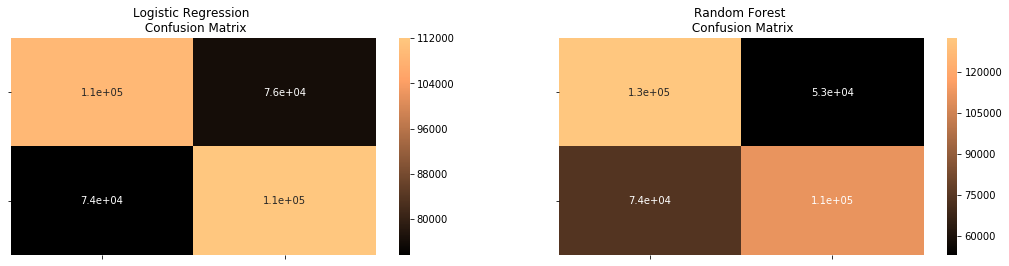

In [13]:
#Set input and output variables for models with balanced dataset.  

X = balanced_df[['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier','FlightNum',
              'TailNum','CRSElapsedTime','Origin','Dest','Distance']]

y = balanced_df['Late']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

#Define classifer models
lr = LogisticRegression()
rf = RandomForestClassifier()

#Fit classifer models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

#Return classifer accuracy scores
print('Logisitic Regression Classifer Model Accuarcy is', round(lr.score(X_test, y_test) * 100,2),'%')
print('Random Forest Classifer Model Accuarcy is', round(rf.score(X_test, y_test) * 100,2),'%')

#Get y_pred for classifers
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

#Get confusion matrix for all classifers
lr_cm = confusion_matrix(y_test, y_pred_lr)
rf_cm = confusion_matrix(y_test, y_pred_rf)

#Setup Confusion Matrix Plots
fig, ax = plt.subplots(1, 2,figsize=(18,4))
labels = ['No Fraud', 'Fraud']

#Logisitic Regression Confusion Matrix
sns.heatmap(lr_cm, ax=ax[0], annot=True, annot_kws={"size": 10}, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=12)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

#Random Forest Confusion Matrix
sns.heatmap(rf_cm, ax=ax[1], annot=True, annot_kws={"size": 10}, cmap=plt.cm.copper)
ax[1].set_title("Random Forest \n Confusion Matrix", fontsize=12)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

# Feature Engineering: Arrival Delays

In [14]:
#Feature 1
#Create Average Arrival Delay by Unique Carrier Feature
df_temp = balanced_df.groupby('UniqueCarrier').ArrDelay.mean().reset_index()
df_temp['Avg_Arr_Delay_Carr'] = df_temp.ArrDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['UniqueCarrier','Avg_Arr_Delay_Carr']], on=['UniqueCarrier'])

#Feature 2
#Create Average Arrival Delay by Origin Feature
df_temp = balanced_df.groupby('Origin').ArrDelay.mean().reset_index()
df_temp['Avg_Arr_Delay_Origin'] = df_temp.ArrDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Origin','Avg_Arr_Delay_Origin']], on=['Origin'])

#Feature 3
#Create Average Arrival Delay by Destination Feature
df_temp = balanced_df.groupby('Dest').ArrDelay.mean().reset_index()
df_temp['Avg_Arr_Delay_Dest'] = df_temp.ArrDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Dest','Avg_Arr_Delay_Dest']], on=['Dest'])

#Feature 4
#Map Origin with Destination to create route feature
route_list = []
origin_list = balanced_df['Origin']
dest_list = balanced_df['Dest']
for i in zip(origin_list,dest_list):
    route_list.append(i)

#Add list to dataframe and make a categorial number    
balanced_df['Route'] = route_list
balanced_df['Route'] = pd.Categorical(balanced_df.Route).codes

#Create Average Arrival Delay by Route Feature
df_temp = balanced_df.groupby('Route').ArrDelay.mean().reset_index()
df_temp['Avg_Arr_Delay_Route'] = df_temp.ArrDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Route','Avg_Arr_Delay_Route']], on=['Route'])

# Feature Engineering: Historic Departure Times - Planned vs. Actual

In [15]:
#Create Historic Late Departure Feature
balanced_df['Late_Dep'] = balanced_df['CRSDepTime'] - balanced_df['DepTime']

#Feature 1
#Create Average Late Departure Times by Unique Carrier Feature
df_temp = balanced_df.groupby('UniqueCarrier').Late_Dep.mean().reset_index()
df_temp['Avg_Late_Dep_Carr'] = df_temp.Late_Dep

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['UniqueCarrier','Avg_Late_Dep_Carr']], on=['UniqueCarrier'])

#Feature 2
#Create Average Late Departure Times by Origin Feature
df_temp = balanced_df.groupby('Origin').Late_Dep.mean().reset_index()
df_temp['Avg_Late_Dep_Origin'] = df_temp.Late_Dep

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Origin','Avg_Late_Dep_Origin']], on=['Origin'])

#Feature 3
#Create Average Late Departure Times by Destination Feature
df_temp = balanced_df.groupby('Dest').Late_Dep.mean().reset_index()
df_temp['Avg_Late_Dep_Dest'] = df_temp.Late_Dep

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Dest','Avg_Late_Dep_Dest']], on=['Dest'])

#Feature 4
#Create Average Late Departure by Route Feature
df_temp = balanced_df.groupby('Route').Late_Dep.mean().reset_index()
df_temp['Avg_Late_Dep_Route'] = df_temp.Late_Dep

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Route','Avg_Late_Dep_Route']], on=['Route'])

# Feature Engineering: Historic Arrival Times - Planned vs. Actual

In [16]:
#Create Historic Late Arrival Feature
balanced_df['Late_Arr'] = balanced_df['CRSArrTime'] - balanced_df['ArrTime']

#Feature 1
#Create Average Late Arrival Times by Unique Carrier Feature
df_temp = balanced_df.groupby('UniqueCarrier').Late_Arr.mean().reset_index()
df_temp['Avg_Late_Arr_Carr'] = df_temp.Late_Arr

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['UniqueCarrier','Avg_Late_Arr_Carr']], on=['UniqueCarrier'])

#Feature 2
#Create Average Late Arrival Times by Origin Feature
df_temp = balanced_df.groupby('Origin').Late_Arr.mean().reset_index()
df_temp['Avg_Late_Arr_Origin'] = df_temp.Late_Arr

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Origin','Avg_Late_Arr_Origin']], on=['Origin'])

#Feature 3
#Create Average Late Arrival Times by Destination Feature
df_temp = balanced_df.groupby('Dest').Late_Arr.mean().reset_index()
df_temp['Avg_Late_Arr_Dest'] = df_temp.Late_Arr

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Dest','Avg_Late_Arr_Dest']], on=['Dest'])

#Feature 4
#Create Average Late Arrival by Route Feature
df_temp = balanced_df.groupby('Route').Late_Arr.mean().reset_index()
df_temp['Avg_Late_Arr_Route'] = df_temp.Late_Arr

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Route','Avg_Late_Arr_Route']], on=['Route'])

# Feature Engineering: Departure Delays

In [17]:
#Feature 1
#Create Average Departure Delay by Unique Carrier Feature
df_temp = balanced_df.groupby('UniqueCarrier').DepDelay.mean().reset_index()
df_temp['Avg_Dep_Delay_Carr'] = df_temp.DepDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['UniqueCarrier','Avg_Dep_Delay_Carr']], on=['UniqueCarrier'])

#Feature 2
#Create Average Departure Delay by Origin Feature
df_temp = balanced_df.groupby('Origin').DepDelay.mean().reset_index()
df_temp['Avg_Dep_Delay_Origin'] = df_temp.DepDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Origin','Avg_Dep_Delay_Origin']], on=['Origin'])

#Feature 3
#Create Average Departure Delay by Destination Feature
df_temp = balanced_df.groupby('Dest').DepDelay.mean().reset_index()
df_temp['Avg_Dep_Delay_Dest'] = df_temp.DepDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Dest','Avg_Dep_Delay_Dest']], on=['Dest'])

#Feature 4
#Create Average Departure Delay by Route Feature
df_temp = balanced_df.groupby('Route').DepDelay.mean().reset_index()
df_temp['Avg_Dep_Delay_Route'] = df_temp.DepDelay

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Route','Avg_Dep_Delay_Route']], on=['Route'])

# Feature Engineering: Other Delays

In [18]:
#Add all other delays
cd = balanced_df['CarrierDelay']
wd = balanced_df['WeatherDelay']
nd = balanced_df['NASDelay']
sd = balanced_df['SecurityDelay']
lad = balanced_df['LateAircraftDelay']

balanced_df['other_delays'] = cd + wd + nd + sd + lad

#Feature 1
#Create Average Other Delays by Unique Carrier Feature
df_temp = balanced_df.groupby('UniqueCarrier').other_delays.mean().reset_index()
df_temp['other_delays_carr'] = df_temp.other_delays

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['UniqueCarrier','other_delays_carr']], on=['UniqueCarrier'])

#Feature 2
#Create Average Other Delays by Origin Feature
df_temp = balanced_df.groupby('Origin').other_delays.mean().reset_index()
df_temp['other_delays_origin'] = df_temp.other_delays

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Origin','other_delays_origin']], on=['Origin'])

#Feature 3
#Create Average Other Delays by Destination Feature
df_temp = balanced_df.groupby('Dest').other_delays.mean().reset_index()
df_temp['other_delays_dest'] = df_temp.other_delays

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Dest','other_delays_dest']], on=['Dest'])

#Feature 4
#Create Average Departure Delay by Route Feature
df_temp = balanced_df.groupby('Route').other_delays.mean().reset_index()
df_temp['other_delays_route'] = df_temp.other_delays

#Merge dataframes
balanced_df = pd.merge(balanced_df, df_temp[['Route','other_delays_route']], on=['Route'])

# Model Evaluation - New Features

In [19]:
X = balanced_df[['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',
                 'FlightNum','TailNum','CRSElapsedTime','Origin','Distance',
                 'Avg_Arr_Delay_Carr','Avg_Arr_Delay_Origin','Avg_Arr_Delay_Dest','Avg_Arr_Delay_Route',
                 'Avg_Dep_Delay_Carr','Avg_Dep_Delay_Origin','Avg_Dep_Delay_Dest','Avg_Dep_Delay_Route',
                 'other_delays_carr','other_delays_origin','other_delays_dest','other_delays_route',
                'Avg_Late_Arr_Carr', 'Avg_Late_Arr_Origin','Avg_Late_Arr_Dest','Avg_Late_Arr_Route',
                'Avg_Late_Dep_Carr', 'Avg_Late_Dep_Origin','Avg_Late_Dep_Dest','Avg_Late_Dep_Route']]

y = balanced_df['Late']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

#Run baseline model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Baseline Model Accuarcy w/new features is', round(lr.score(X_test, y_test) * 100,2),'%')

Baseline Model Accuarcy w/new features is 62.11 %


# Final Feature Selection

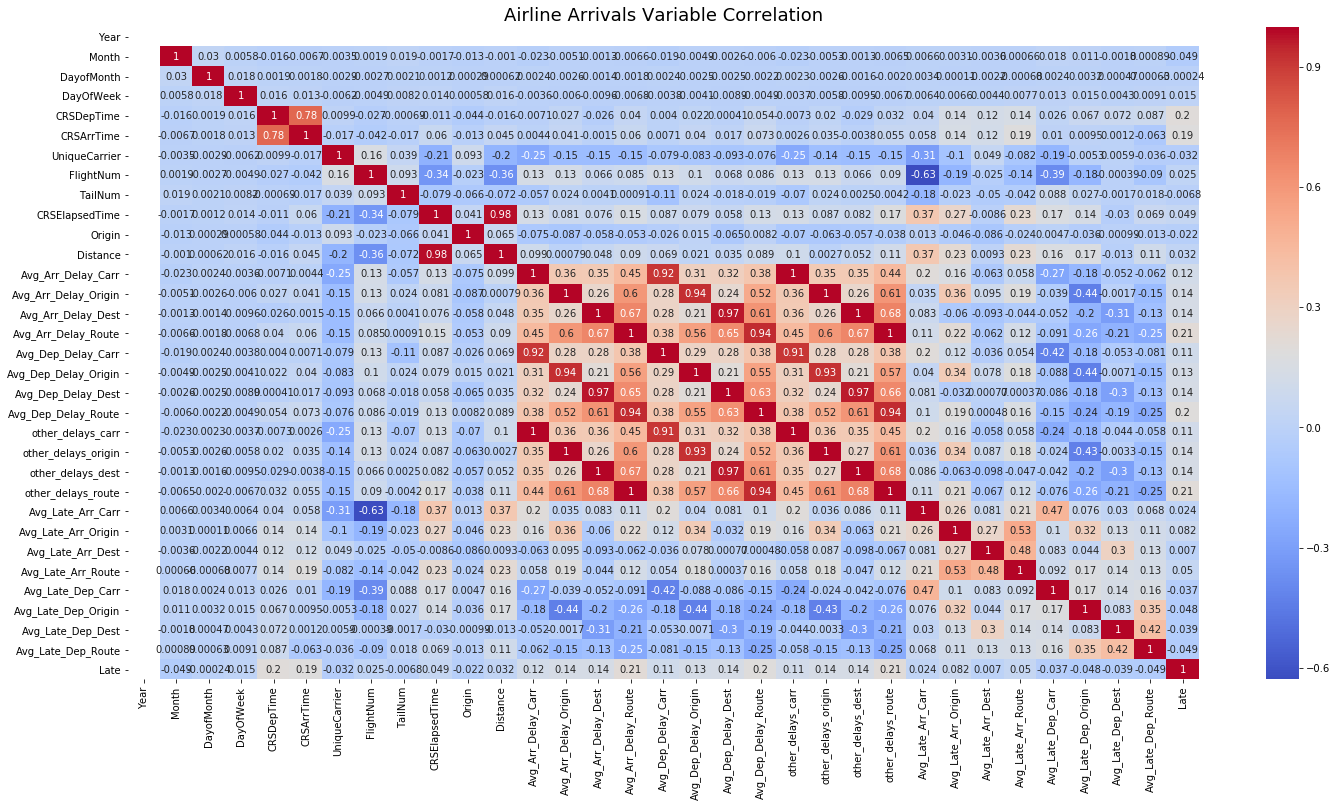

In [20]:
#Create correlation plot
plt.figure(figsize=(24,12))

X['Late'] = y

corr = X.corr()
sns.heatmap(corr, cmap='coolwarm',annot=True, annot_kws={"size": 10})
plt.title('Airline Arrivals Variable Correlation', fontsize=18)

plt.show()

# Model Evaluation: Final

In [21]:
#Selected final features for model 
X = balanced_df[['CRSDepTime','CRSArrTime','Avg_Arr_Delay_Route','Avg_Dep_Delay_Route','other_delays_route']]

#Define various classifers for voting
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()

#Use Voting Classifer 
vc = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gb',gb) ,('knn',knn),('dtc', dtc)], voting='hard')
vc.fit(X_train, y_train)

print('Voting Classifer Model Accuarcy is', round(vc.score(X_test, y_test) * 100,2),'%')

Voting Classifer Model Accuarcy is 66.46 %


# Conclusion

Using Logistic regression using all the features in the dataframe, I was able to obtain model accuracy of 100%.  However, this was the case because some of the features in the train set were actually those we were attempting predict.  Also, many of these feature would not be available prior to the running the model; thus causing data leakage.  

After removing these highly correlated features, I was able to obtain a model accuracy of 87%, which was expected given that 87% of the output variable corresponds to 1 class (On_time Arrivals).  

After run Logistic regression on a balanced dataframe(50% On-time and 50% Late arrivals), I was able to get a model accuracy of 65%.  

Finally, after using the voting classifer, I was able to boost the model accuracy only 1% to 66%.  To improve the model, I would look for additional datapoints to build more features with greater predictor power.  